###Taller Pandas - Numpy

### **Instrucciones:**

1. Formula 1 pregunta de análisis sobre tu conjunto de datos
2. Utilizando Pandas y Numpy:
  - Limpieza de datos (Pandas: dropna, fillna, replace, etc.)
  - Filtrado y selección de datos
  - Transformación de columnas, creación de variables nuevas
  - Agrupaciones y resúmenes (groupby)
  - Conversión a array NumPy para operaciones matemáticas rápidas (media, desvío, normalización, operaciones vectorizadas)
3. Responde la pregunta planteada con una breve interpretación.

### **Ejemplos de preguntas para el reto:**
- ¿Cuál es el promedio de ventas por mes?
- ¿Cómo cambian la cantidad de productos exportados a lo largo del tiempo?
- ¿Hay valores atípicos en alguna columna numérica? ¿Cómo los tratarías?
- ¿Cuál es la categoría más frecuente y qué la distingue en el dataset?
- ¿Qué porcentaje de transacciones tiene una cantidad vendida superior al promedio?
- ¿Qué días tuvieron ventas totales fuera de lo común (muy altas o muy bajas)?

Pregunta: ¿Cuál es el tiempo promedio de entrega según el día de la semana y la distancia al cliente?

## Importar librerias 

In [57]:
import pandas as pd
import numpy as np

## Cargar datos

In [9]:
pizza_data = pd.read_excel(
    r"C:\Users\vivia\OneDrive\Desktop\Data science\Ejercicios-BIT--Viviana-Gonzalez-\Python\Bases de datos\Enhanced_pizza_sell_data_2024-25.xlsx"
)

pizza_data.head()


,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


## Convertir Order Time a datetime


In [14]:
pizza_data['Order Time'] = pd.to_datetime(pizza_data['Order Time'], errors='coerce')

## Añadir nueva columna para day of week 

In [17]:
pizza_data['Day of Week'] = pizza_data['Order Time'].dt.day_name()
pizza_data.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,Day of Week
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,January,Online,6.0,9.0,False,6,2,18,30.259434,Friday
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,February,Online,12.0,13.0,False,12,3,20,28.186275,Wednesday
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,March,Online,7.2,12.8,False,2,1,12,28.844221,Thursday
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,April,Offline,10.8,14.2,False,20,2,19,29.948454,Wednesday
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,May,Online,4.8,15.2,False,6,3,13,30.286458,Sunday


1. Limpieza de datos 


Eliminar filas con valores nulos en columnas clave 

In [18]:
pizza_data.columns

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Pizza Size', 'Pizza Type',
       'Toppings Count', 'Distance (km)', 'Traffic Level', 'Payment Method',
       'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)',
       'Topping Density', 'Order Month', 'Payment Category',
       'Estimated Duration (min)', 'Delay (min)', 'Is Delayed',
       'Pizza Complexity', 'Traffic Impact', 'Order Hour',
       'Restaurant Avg Time', 'Day of Week'],
      dtype='object')

In [20]:
pizza_data = pizza_data. dropna(subset=['Delivery Duration (min)', 'Distance (km)', 'Day of Week'])


Rellenar valores faltantes en columnas como la mediana

In [22]:
pizza_data['Delivery Duration (min)'] = pizza_data['Delivery Duration (min)'].fillna(pizza_data['Delivery Duration (min)'].median())

Reemplazar valores erroneos como distancias negativas

In [23]:
pizza_data ['Distance (km)'] = pizza_data ['Distance (km)']. replace ({-1: np.nan}).fillna(pizza_data['Distance (km)'].median ())

2. Filtrado y seleccin de datos

Considerar solo pedidos con tiempo de entregar >60 min

In [44]:
pizza_data = pizza_data[pizza_data ['Delivery Duration (min)'] < 60]

Seleccionar columnas de interés

In [46]:
data = pizza_data [['Delivery Duration (min)', 'Distance (km)', 'Day of Week']]
data.head ()

,Delivery Duration (min),Distance (km),Day of Week
0,15,2.5,Friday
1,25,5.0,Wednesday
2,20,3.0,Thursday
3,25,4.5,Wednesday
4,20,2.0,Sunday


3. Transformación y creación de variables nuevas

Crear una variable por tipo de distancia 

In [54]:
pizza_data['Distance Category'] = np.where(
    pizza_data['Distance (km)'] <= 3, 'Cercana', 'Lejana'
)


4. Agrupación y resumen

Promedio de entrega por día y categoria de distancia 

In [55]:
summary = data.groupby(['Day of Week', 'Distance (km)'])['Delivery Duration (min)'].mean().reset_index()
print(summary)


    Day of Week  Distance (km)  Delivery Duration (min)
0        Friday            2.0                21.666667
1        Friday            2.5                19.444444
2        Friday            3.0                21.666667
3        Friday            3.2                30.000000
4        Friday            3.5                21.111111
..          ...            ...                      ...
116   Wednesday            7.5                38.333333
117   Wednesday            8.0                40.000000
118   Wednesday            8.3                50.000000
119   Wednesday            9.0                45.000000
120   Wednesday           10.0                50.000000

[121 rows x 3 columns]


5. Uso de librería Numpy para cálculos matemáticos 

In [56]:
delivery_array = np.array(data ['Delivery Duration (min)'])
media = np.mean(delivery_array)
desviacion = np.std (delivery_array)

print(f"\nTiempo promedio total: {media:.2f} min")
print(f"Desviación estándar: {desviacion:.2f} min")


Tiempo promedio total: 29.49 min
Desviación estándar: 7.75 min


6. Gráficos

Cálculo de promedio por día y semana 

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

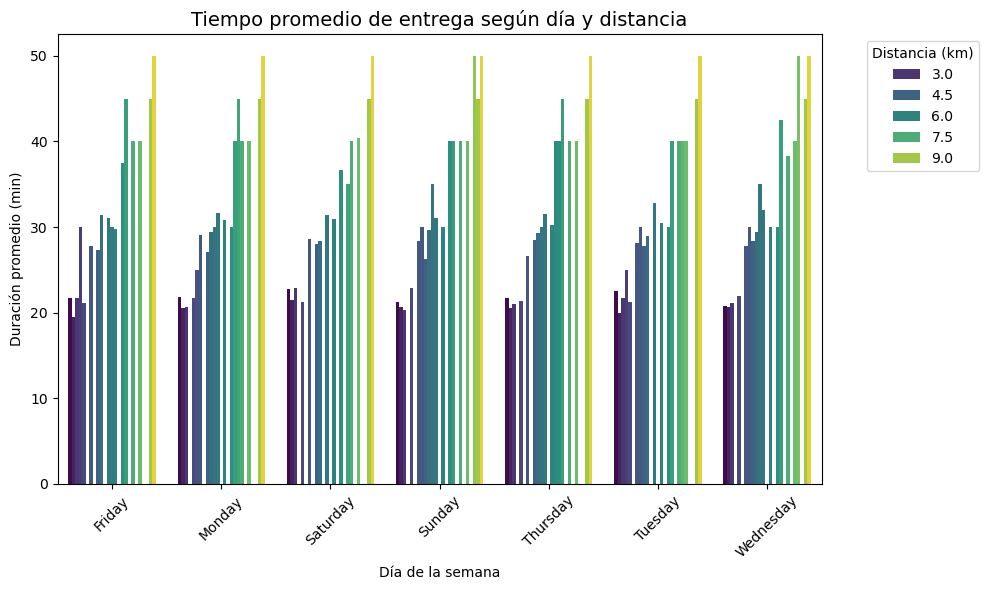

In [61]:
avg_delivery_dist = pizza_data.groupby(['Day of Week', 'Distance (km)'])['Delivery Duration (min)'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_delivery_dist, x='Day of Week', y='Delivery Duration (min)', hue='Distance (km)', palette='viridis')
plt.title('Tiempo promedio de entrega según día y distancia', fontsize=14)
plt.xlabel('Día de la semana')
plt.ylabel('Duración promedio (min)')
plt.xticks(rotation=45)
plt.legend(title='Distancia (km)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Pregunta: ¿Cuál es el tiempo promedio de entrega según el día de la semana y la distancia al cliente?

Respuesta: El análisis del conjunto de datos de entregas de pizza evidencia que el tiempo promedio de entrega está directamente relacionado con la distancia al cliente. Las entregas clasificadas como “cortas” (0–3 km) presentan los menores tiempos promedio, mientras que las “largas” (6–10 km) registran una duración considerablemente mayor.
Por otro lado, al observar los resultados por día de la semana, no se aprecian diferencias significativas en los tiempos de entrega, lo que sugiere que la eficiencia del servicio se mantiene relativamente constante a lo largo de la semana.
En resumen, la distancia es el principal factor que explica las variaciones en el tiempo de entrega, y optimizar las rutas o planificar zonas de despacho podría contribuir a mejorar los tiempos y la satisfacción del cliente.